# Creating scatter plots with pandas, matplotlib, and seaborn

I wanted an easy way to plot scatter plots with marker size and marker color and the legend on the plot. I couldn't figure out how to install ggplot for Python so I wrote my own scatter plot. (I eventually figured out how to install it but after I already wrote this.)

by Ben Lacar

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ggplot import *    # requires a pip install
%matplotlib inline

In [30]:
import sys
!{sys.executable} -m pip install ggplot

    100% |████████████████████████████████| 2.2MB 628kB/s eta 0:00:01
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
from ggplot import *

/Users/lacar/anaconda/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/lacar/anaconda/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/lacar/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Use a complex sample data frame for a variety of test cases

This is necessary to test the robustness of the visualization properties of the function. In addition to the variety of distributions, zeros, negatives, fractions, and a large range of numbers are represented.

In [22]:
# Alter the number of samples (training examples).
# Use a small m (20) to verify plotting properties and large m (1000) as a test case

m = 30

In [96]:
np.arange(0, m)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [34]:
uniform_dist = np.arange(0, m)
gaussian_dist = np.random.normal(loc=0, scale=100, size=m)
bimodal_dist = (np.random.normal(loc=200, scale=100, size=int(m/2)).tolist()
                + np.random.normal(loc=800, scale=100, size=int(m/2)).tolist()) # I just mashed two normal distributions together
lognormal_dist = np.random.lognormal(5, 1, m)
poisson_dist = np.random.poisson(lam=0.3, size=m)
negbinomial_dist = np.random.negative_binomial(2, 0.1, size=m)
chisquare_dist = np.random.chisquare(df=4, size=m)
large_range = np.arange(0, m)**2       # Range of numbers across 6 log orders)
leftskew_dist = 100-np.random.negative_binomial(2, 0.1, size=m)

# Create dataframe with regression features
df = pd.DataFrame({'uniform': uniform_dist,
                  'gaussian': gaussian_dist,
                  'bimodal': bimodal_dist,
                  'lognormal': lognormal_dist,
                  'poisson': poisson_dist,
                   'negbinomial': negbinomial_dist,
                   'chisquare': chisquare_dist,
                   'large_range': large_range,
                   'leftskew_dist': leftskew_dist
                  })

# Create classification features and add to dataframe

k = 5     # number of groups
groupSize = round(m/k)
df['class_even'] = (['group 1']*groupSize + ['group 2']*groupSize
                     + ['group 3']*groupSize + ['group 4']*groupSize
                     + ['group 5']*(m-groupSize*(k-1)))

#                      + ['group 5']*groupSize + ['group 6']*groupSize
#                      + ['group 7']*groupSize + ['group 8']*groupSize
#                      + ['group 9']*groupSize
#                      + ['group 10']*(m-groupSize*(k-1)))

df['class_poisson'] = ['group ' + str(i+1) for i in poisson_dist.tolist()]


In [35]:
df

,bimodal,chisquare,gaussian,large_range,leftskew_dist,lognormal,negbinomial,poisson,uniform,class_even,class_poisson
0,154.250607,6.316693,-78.915374,0,89,76.664209,15,0,0,group 1,group 1
1,201.845077,3.965357,-23.312473,1,65,984.974379,9,0,1,group 1,group 1
2,260.563106,2.779451,191.841673,4,84,58.073001,25,0,2,group 1,group 1
3,118.606620,2.886615,55.952445,9,84,7.025429,26,1,3,group 1,group 2
4,194.212954,12.006341,-116.373243,16,57,338.770022,23,0,4,group 1,group 1
5,134.970457,4.984677,66.169012,25,81,30.928304,38,0,5,group 1,group 1
6,312.395224,3.714452,149.826987,36,92,216.290403,5,0,6,group 2,group 1
7,187.471422,3.240577,-65.834795,49,81,79.486020,16,0,7,group 2,group 1
8,153.502224,2.098391,30.631864,64,99,189.996401,7,0,8,group 2,group 1
9,87.044965,9.083710,52.957192,81,50,451.305621,64,1,9,group 2,group 2


In [36]:
df.columns

Index(['bimodal', 'chisquare', 'gaussian', 'large_range', 'leftskew_dist',
       'lognormal', 'negbinomial', 'poisson', 'uniform', 'class_even',
       'class_poisson'],
      dtype='object')

## g_scatter function

In [63]:
def g_scatter(df, x, y, size, color, ax):
        
    markerSize=df[size]

    # Make a sizes vector and add it to the dataframe (removed at the end of the function)
    szMaxMarker = 200
    df['sizes_gScatter'] = 1+szMaxMarker*((markerSize-markerSize.min())/(markerSize.max()-markerSize.min()))
    

    # Create a plot as an underlayer, serving as a proxy for the legend for marker size
    noLegendPoints = 5  # number of points (default will be 5)

    # legend points, distributed through the size range
    legendPoints_ideal = np.linspace(markerSize.min(),
                                     markerSize.max(),
                                     noLegendPoints)  

    # get dataframe rows that are closest to the legendPoints_ideal
    # dense list comprehension to get the closest values in the dataset that are distributed
    legendPoints_data = [(df[size].iloc[(df[size]-x).abs().argsort()[0]]) for x in legendPoints_ideal]
    
    # find the rows and make a new dataframe; 
    dfTemp = df[df[size].isin(legendPoints_data)]  
    dfTemp2 = dfTemp.sort_values(by='sizes_gScatter')   # sort by size

    # plot this as an underlayer (plotted here, before plotting all data)
    for i, data in dfTemp2.iterrows():
        # while this is an underlayer, set the plot points to white so it's the same as the background
        ax.scatter(data[x], data[y], s=(data['sizes_gScatter']), c='w', label= "%.2f" % data[size])

    # ax.scatter(data[x], data[y], s=markerSize)   #, c='w', label= "%.2f" % data['feature_sz']) #label=str(data['feature_sz']))

    # --- Place the legend which should only show for the underlaying plot ---
    first_legend = ax.legend(title=size, loc='upper left', bbox_to_anchor=(1,1))
    # Manually set the colors of the marker legends to black (the legend points would have been white or non-visible)
    for i in range(len(first_legend.legendHandles)):
         first_legend.legendHandles[i].set_color('black')

    # Add first legend manually to the current Axes.
    plt.gca().add_artist(first_legend)        

    # colors for categorical variables  
    #colors=['gray', 'blue', 'green', 'yellow', 'red']

    # ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

    for i,data in enumerate(df[color].unique()):
        dfTemp = df[df[color]==data]
        ax.scatter(x=dfTemp[x], y=dfTemp[y], s=dfTemp['sizes_gScatter'], c=colors[i], label=None)

    # re-plotting for the purposes of the class legend

    # Using mpatches to add second legend with colors of the groups 
    import matplotlib.patches as mpatches
    groups = df[color].unique().tolist()
    group_patches = list()
    for i,data in enumerate(groups):
        #print(i, data, groups[i])
        group_patches.append(mpatches.Patch(color=colors[i], label=data))

    # changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend    
    ax.legend(handles=group_patches, title='group', loc='upper left', bbox_to_anchor=(1,0.5), handlelength=0.7)


In [64]:
colors = ['red', 'orange', 'yellow', 'greenyellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black']

#### Test when zero is present

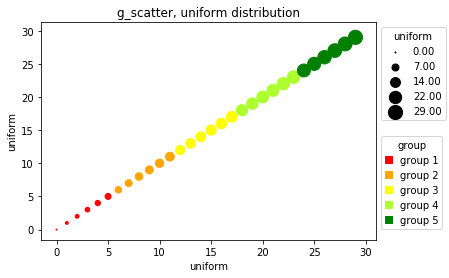

In [84]:
# Plotting with g_scatter function
f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='uniform', size='uniform', color='class_even', ax=ax1);
ax1.set_title('g_scatter, uniform distribution');
ax1.set_xlabel('uniform');
ax1.set_ylabel('uniform');

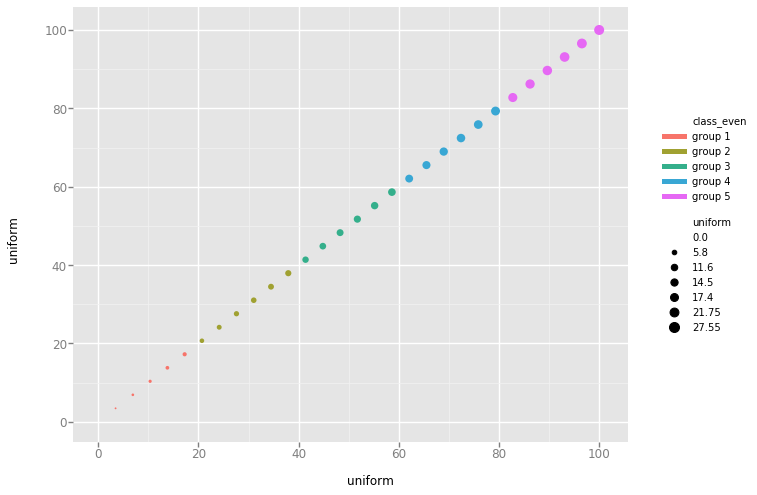

<ggplot: (-9223372036547871018)>

In [89]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='uniform', size='uniform', color='class_even')) + geom_point()

#### Test when negative numbers, fractions are present

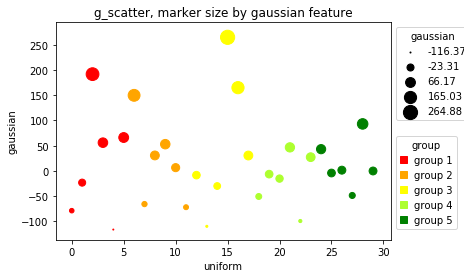

In [93]:
# Plotting with g_scatter function
f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='gaussian', size='gaussian', color='class_even', ax=ax1);
ax1.set_title('g_scatter, marker size by gaussian feature');
ax1.set_xlabel('uniform')
ax1.set_ylabel('gaussian')

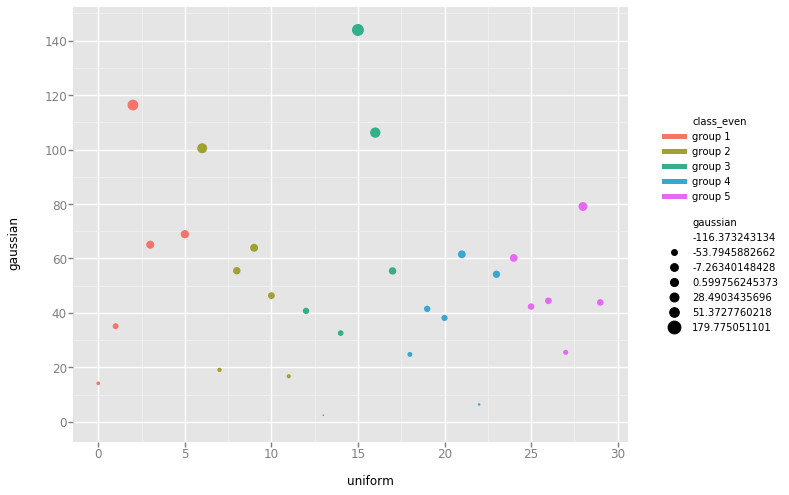

<ggplot: (-9223372036547980130)>

In [94]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='gaussian', size='gaussian', color='class_even')) + geom_point()

#### Test with negative binomial distribution and all values are positiive

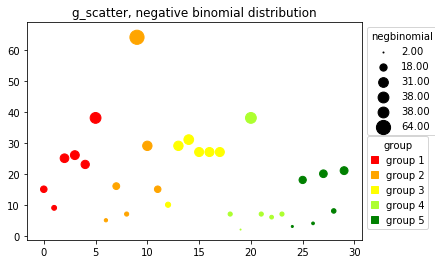

In [97]:
f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='negbinomial', size='negbinomial', color='class_even', ax=ax1);
ax1.set_title('g_scatter, negative binomial distribution');

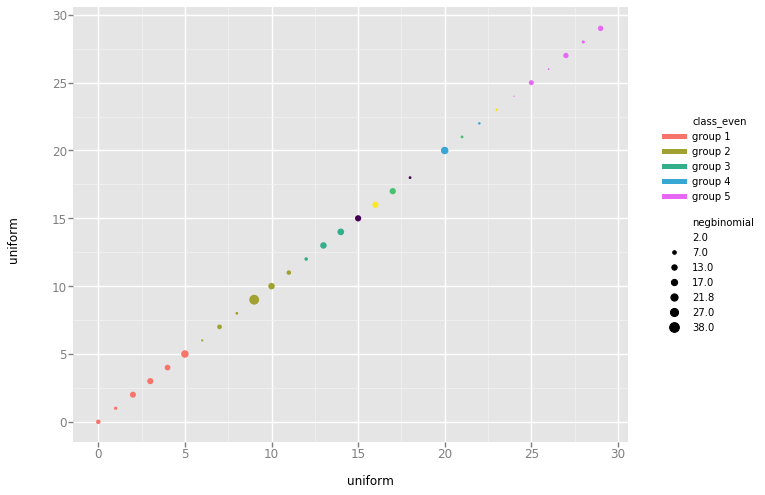

<ggplot: (-9223372036546203602)>

In [99]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='uniform', size='negbinomial', color='class_even')) + geom_point()